In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patches as patches
from collections import Counter
import matplotlib.patheffects as path_effects

import matplotlib.cm as cm
import matplotlib.colors as mcolors

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
import urllib
from urllib.request import urlopen

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("D:\FData\Euro2024\Group_stage_all.csv")

# Prog_Pass

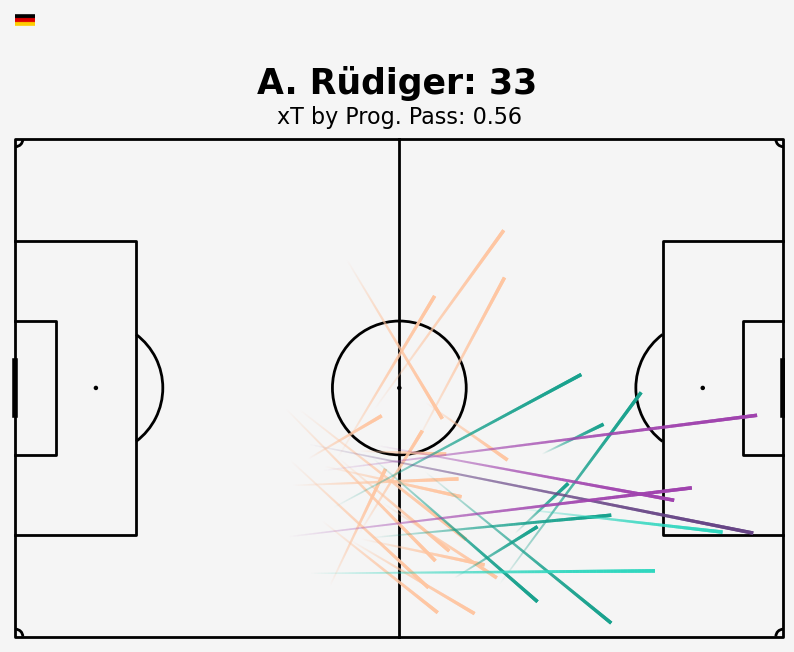

In [101]:
def plot_player_prog_pass(ax, pname):
    dfp = df[(df['name'] == pname) & (df['prog_pass'] >= 9.11) & (df['outcomeType'] == 'Successful') &
             (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['x'] >= 35)]
    dfpen = df[(df['name']==pname) & (df['endX']>=87.5) & (df['endY']>=13.6) & (df['endY']<=54.4) & (df['outcomeType']=='Successful') &
            (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['prog_pass']<9.11) & (df['type']=='Pass')]
    dfp = pd.concat([dfp,dfpen])
    
    pitch = Pitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='k', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.75, 105.25)
    ax.set_ylim(-0.75, 68.25)

    df1 = dfp[dfp['xT']<=0.005]
    df2 = dfp[(dfp['xT']>0.005) & (dfp['xT']<=0.02)]
    df3 = dfp[(dfp['xT']>0.02) & (dfp['xT']<=0.03)]
    df4 = dfp[(dfp['xT']>0.03) & (dfp['xT']<=0.04)]
    df5 = dfp[(dfp['xT']>0.04)]

    pitch.lines(df1.x, df1.y, df1.endX, df1.endY, color='#ffc6a2', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df2.x, df2.y, df2.endX, df2.endY, color='#19a28e', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df3.x, df3.y, df3.endX, df3.endY, color='#30d7bf', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df4.x, df4.y, df4.endX, df4.endY, color='#674586', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df5.x, df5.y, df5.endX, df5.endY, color='#a043ae', lw=2.5, comet=True, transparent=True, ax=ax)

    # ax.scatter(dfp.endX, dfp.endY, s=20, color='#f5f5f5', edgecolor='#ff4b44', zorder=2)
    xT = dfp['xT'].sum().round(2)
    show_name = dfp['shortName'].unique()[0]
    
    ax.set_title(f'{show_name}: {len(dfp)}', color='k', fontsize=25, fontweight='bold', y=1.07)
    ax.text(52.5, 71, f'xT by Prog. Pass: {xT}', color='k', fontsize=16, ha='center', va='center')
    # ax.scatter(4, 4, s=1000, marker='h', color='#808080')
    # ax.scatter(4+6, 4, s=1000, marker='h', color='#1f928b')
    # ax.scatter(4+12, 4, s=1000, marker='h', color='#38b977')
    # ax.scatter(4+18, 4, s=1000, marker='h', color='#91da3b')
    # ax.scatter(4+24, 4, s=1000, marker='h', color='#fce724')
    # path_eff = [path_effects.Stroke(linewidth=1, foreground='k'), path_effects.Normal()]
    # ax.text(4, 4, '<0.005', color='k', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+6, 4, '<0.02', color='k', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+12, 4, '<0.03', color='k', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+18, 4, '<0.04', color='k', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+24, 4, '<0.05', color='k', ha='center', va='center', fontsize=8, path_effects=path_eff)

    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,66))
    ax_size = 0.02
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    return

fig, ax = plt.subplots(figsize=(10,10), facecolor='#f5f5f5')
plot_player_prog_pass(ax, "Antonio Rüdiger")

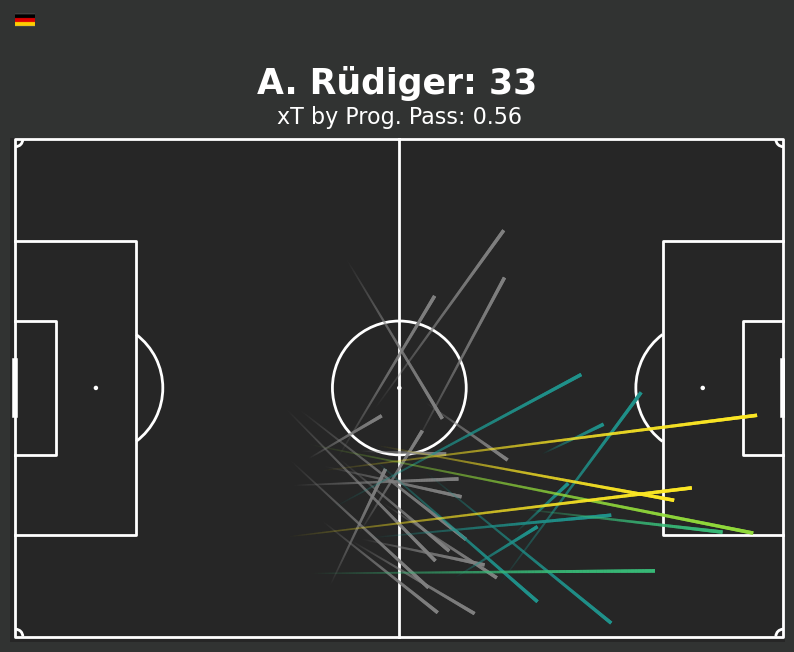

In [103]:
def plot_player_prog_pass(ax, pname):
    dfp = df[(df['name'] == pname) & (df['prog_pass'] >= 9.11) & (df['outcomeType'] == 'Successful') &
             (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['x'] >= 35)]
    dfpen = df[(df['name']==pname) & (df['endX']>=87.5) & (df['endY']>=13.6) & (df['endY']<=54.4) & (df['outcomeType']=='Successful') &
            (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['prog_pass']<9.11) & (df['type']=='Pass')]
    dfp = pd.concat([dfp,dfpen])
    
    pitch = Pitch(pitch_type='uefa', pitch_color='#262626', line_color='w', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.75, 105.25)
    ax.set_ylim(-0.75, 68.25)

    df1 = dfp[dfp['xT']<=0.005]
    df2 = dfp[(dfp['xT']>0.005) & (dfp['xT']<=0.02)]
    df3 = dfp[(dfp['xT']>0.02) & (dfp['xT']<=0.03)]
    df4 = dfp[(dfp['xT']>0.03) & (dfp['xT']<=0.04)]
    df5 = dfp[(dfp['xT']>0.04)]

    pitch.lines(df1.x, df1.y, df1.endX, df1.endY, color='#808080', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df2.x, df2.y, df2.endX, df2.endY, color='#1f928b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df3.x, df3.y, df3.endX, df3.endY, color='#38b977', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df4.x, df4.y, df4.endX, df4.endY, color='#91da3b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df5.x, df5.y, df5.endX, df5.endY, color='#fce724', lw=2.5, comet=True, transparent=True, ax=ax)

    # ax.scatter(dfp.endX, dfp.endY, s=20, color='#f5f5f5', edgecolor='#ff4b44', zorder=2)
    xT = dfp['xT'].sum().round(2)
    show_name = dfp['shortName'].unique()[0]
    
    ax.set_title(f'{show_name}: {len(dfp)}', color='w', fontsize=25, fontweight='bold', y=1.07)
    ax.text(52.5, 71, f'xT by Prog. Pass: {xT}', color='w', fontsize=16, ha='center', va='center')
    # ax.scatter(4, 4, s=1000, marker='h', color='#808080')
    # ax.scatter(4+6, 4, s=1000, marker='h', color='#1f928b')
    # ax.scatter(4+12, 4, s=1000, marker='h', color='#38b977')
    # ax.scatter(4+18, 4, s=1000, marker='h', color='#91da3b')
    # ax.scatter(4+24, 4, s=1000, marker='h', color='#fce724')
    # path_eff = [path_effects.Stroke(linewidth=1, foreground='k'), path_effects.Normal()]
    # ax.text(4, 4, '<0.005', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+6, 4, '<0.02', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+12, 4, '<0.03', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+18, 4, '<0.04', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+24, 4, '<0.05', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)

    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,66))
    ax_size = 0.02
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    return

fig, ax = plt.subplots(figsize=(10,10), facecolor='#313332')
plot_player_prog_pass(ax, "Antonio Rüdiger")

In [104]:
dfp = df[(df['prog_pass'] >= 9.11) & (df['outcomeType'] == 'Successful') &
             (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['x'] >= 35)]
dfpen = df[(df['endX']>=87.5) & (df['endY']>=13.6) & (df['endY']<=54.4) & (df['outcomeType']=='Successful') & (df['prog_pass']<9.11) &
            (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (df['type']=='Pass')]
dfp = pd.concat([dfp,dfpen])

dfpp = dfp.groupby(['name']).count()
dfpp = dfpp.sort_values(by='xT', ascending=False)
top10 = dfpp['xT'].head(12)
top10 = top10.reset_index()
top10 = top10['name'].unique()

top10

array(['Toni Kroos', 'Antonio Rüdiger', 'Giovanni Di Lorenzo',
       'Joshua Kimmich', 'Kieran Trippier', 'Denis Vavro', 'Jules Koundé',
       'Théo Hernández', 'Milan Skriniar', 'Jannik Vestergaard',
       'Dayot Upamecano', 'Virgil van Dijk'], dtype=object)

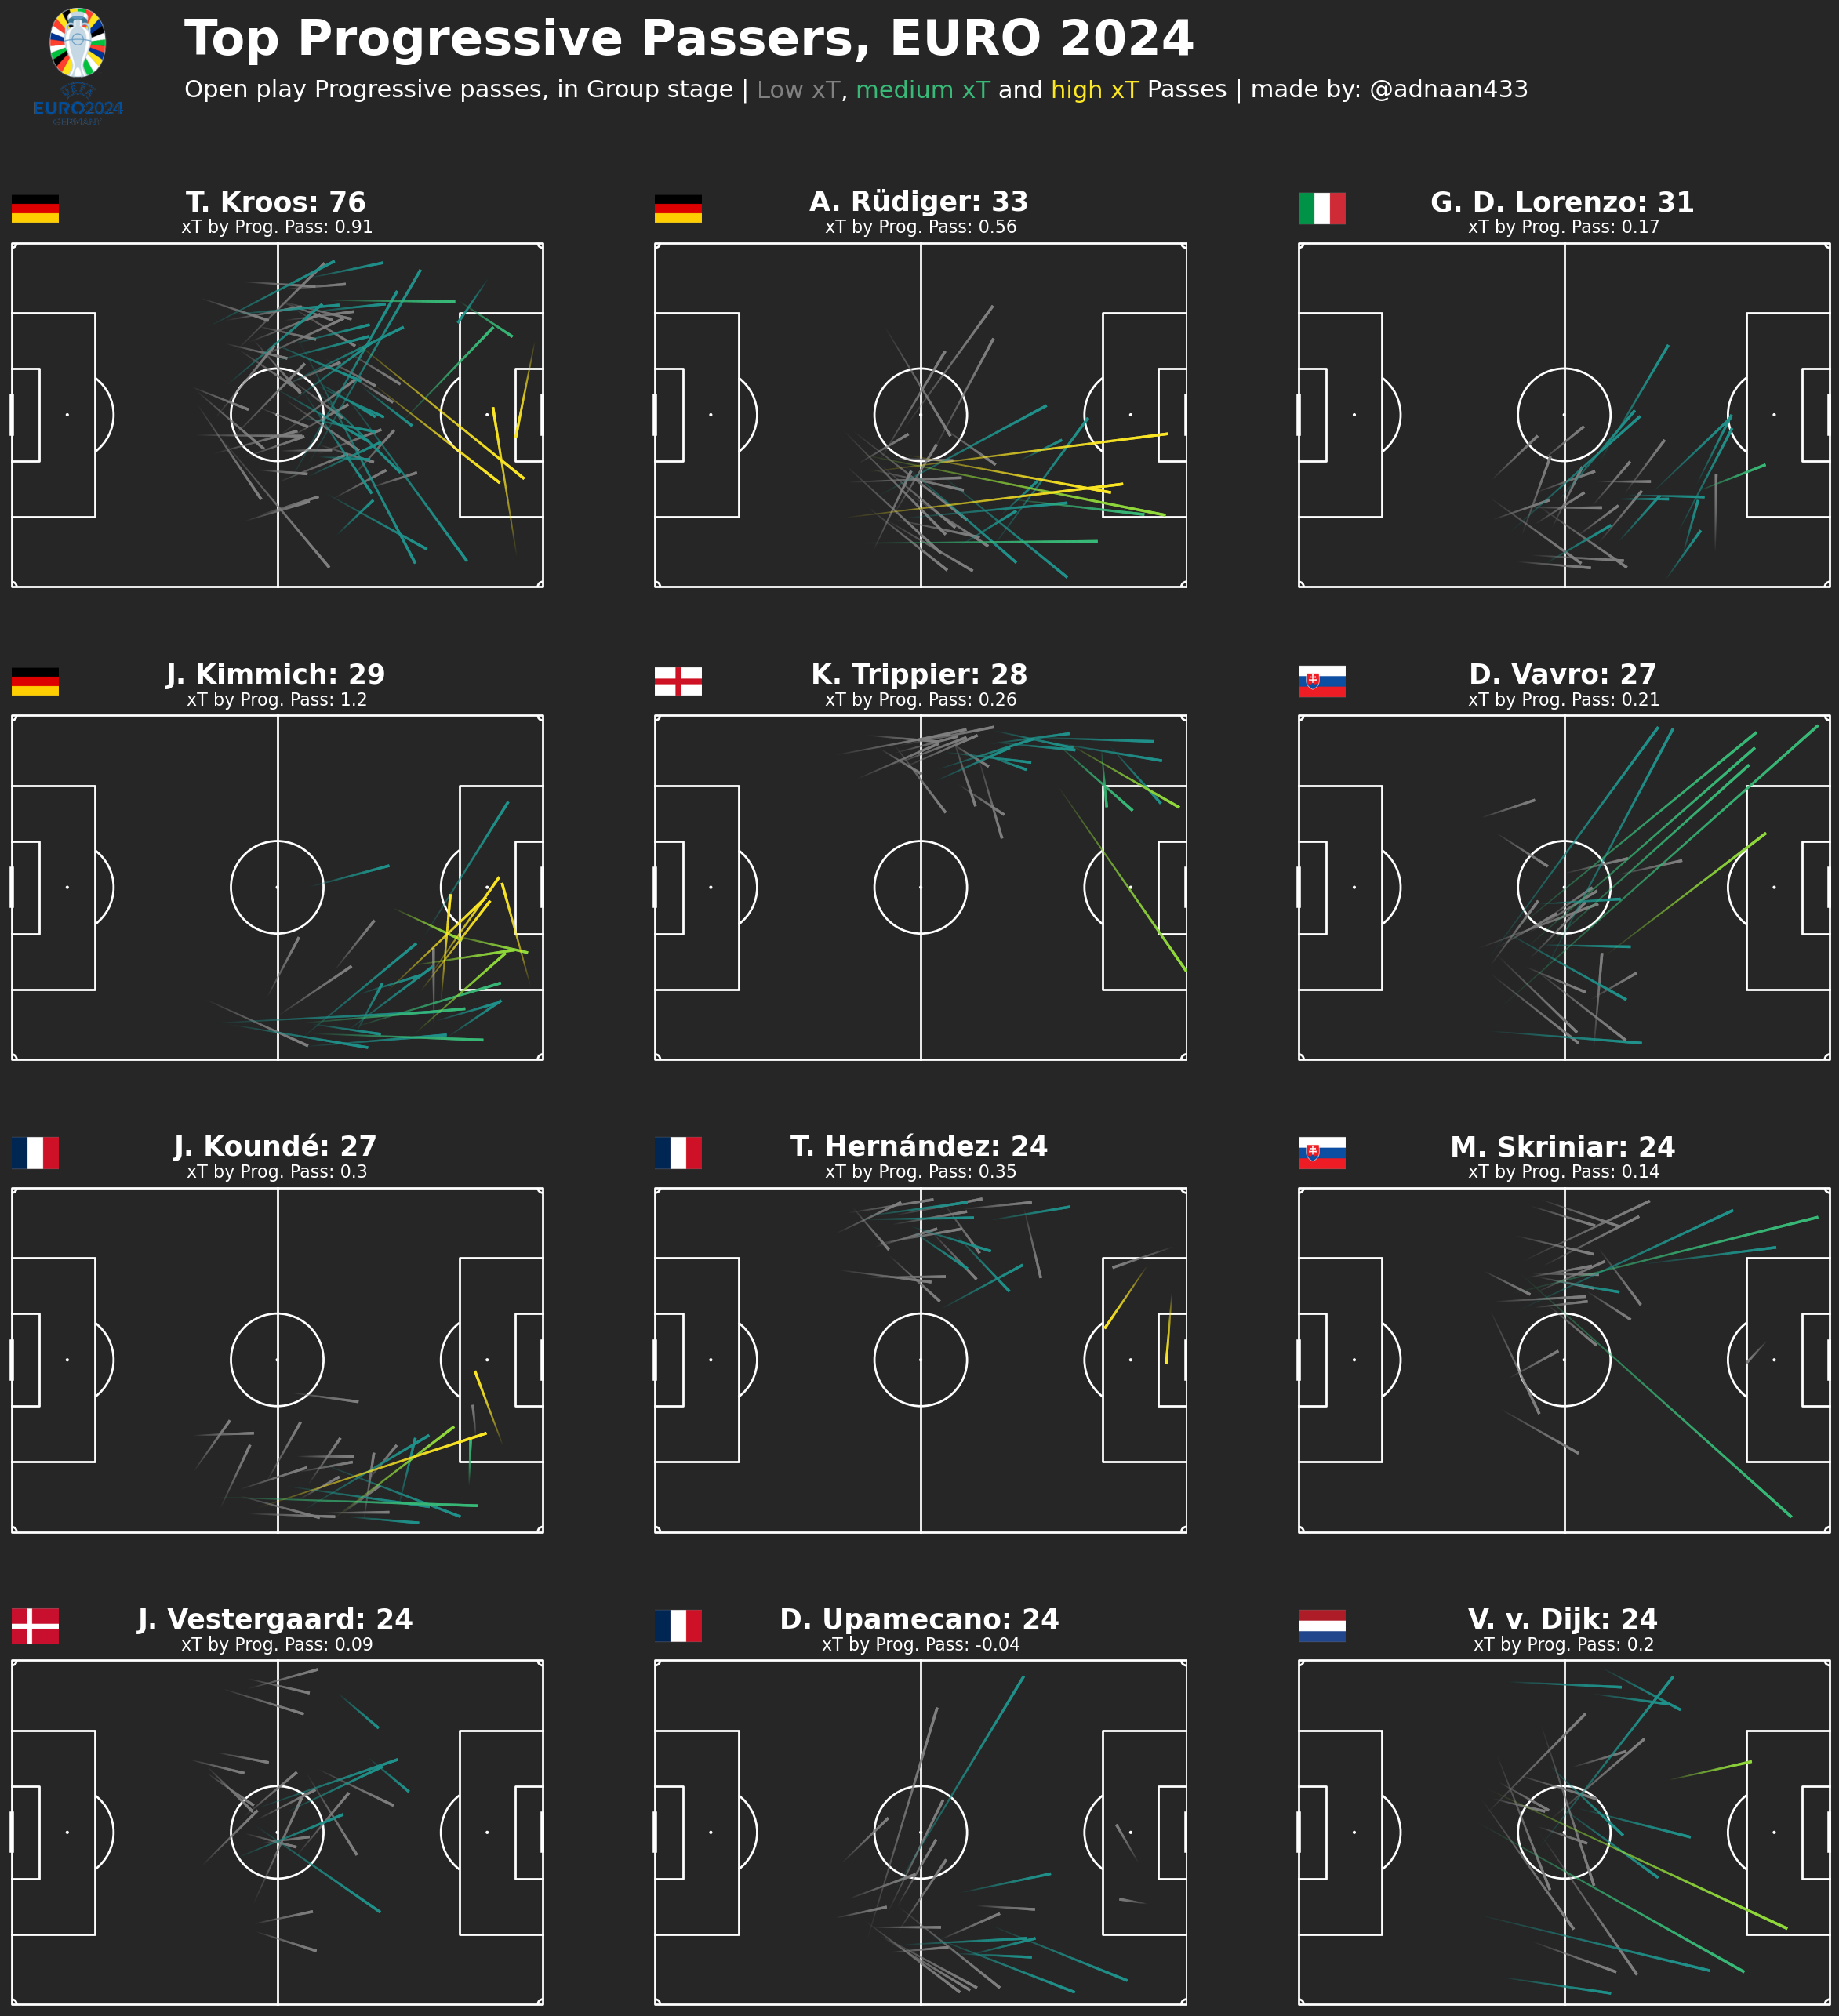

In [105]:
players = top10

fig, axs = plt.subplots(4, 3, figsize=(30, 30), facecolor='#262626')

for i, player in enumerate(players):
    row = i // 3
    col = i % 3
    plot_player_prog_pass(axs[row, col], player)

fig.text(0.2, 0.95, 'Top Progressive Passers, EURO 2024', color='w', fontsize=45, fontweight='bold')
fig_text(0.2, 0.94, 'Open play Progressive passes, in Group stage | <Low xT>, <medium xT> and <high xT> Passes | made by: @adnaan433', 
         color='w', fontsize=22, highlight_textprops=[{'color':'#808080'}, {'color':'#38b977'}, {'color':'#fce724'}])

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/EURO2024.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.13, bottom=0.92, width=0.05, height=0.05)

# Prog_Carry

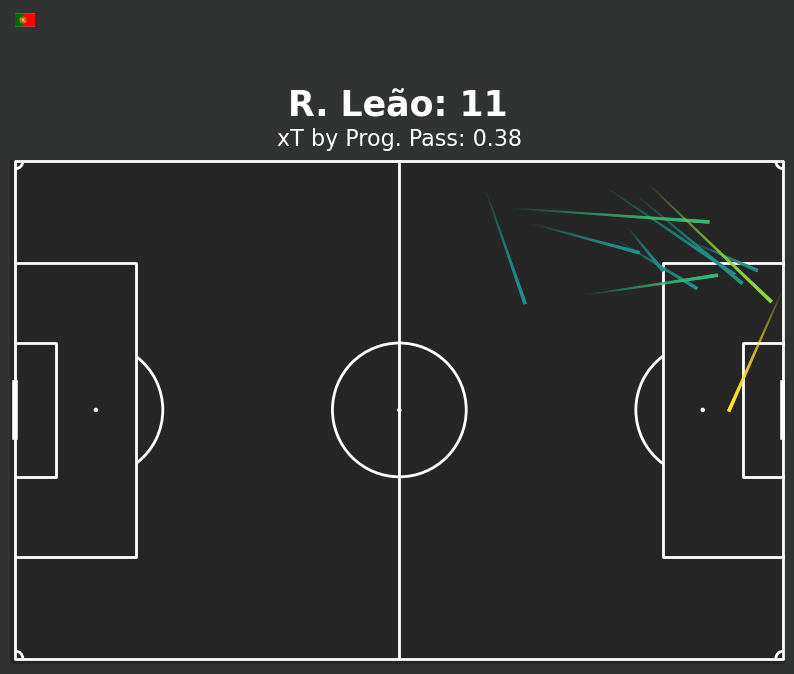

In [106]:
def plot_player_prog_carry(ax, pname):
    dfp = df[(df['name'] == pname) & (df['prog_carry'] >= 9.11) & (df['outcomeType'] == 'Successful') & (df['x'] >= 35)]
    dfpen = df[(df['name']==pname) & (df['endX']>=87.5) & (df['endY']>=13.6) & (df['endY']<=54.4) & (df['prog_carry']<9.11) & (df['type']=='Carry')]
    dfp = pd.concat([dfp,dfpen])
    
    pitch = Pitch(pitch_type='uefa', pitch_color='#262626', line_color='w', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.75, 105.25)
    ax.set_ylim(-0.75, 68.25)

    df1 = dfp[dfp['xT']<=0.005]
    df2 = dfp[(dfp['xT']>0.005) & (dfp['xT']<=0.02)]
    df3 = dfp[(dfp['xT']>0.02) & (dfp['xT']<=0.03)]
    df4 = dfp[(dfp['xT']>0.03) & (dfp['xT']<=0.04)]
    df5 = dfp[(dfp['xT']>0.04)]

    pitch.lines(df1.x, df1.y, df1.endX, df1.endY, color='#808080', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df2.x, df2.y, df2.endX, df2.endY, color='#1f928b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df3.x, df3.y, df3.endX, df3.endY, color='#38b977', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df4.x, df4.y, df4.endX, df4.endY, color='#91da3b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df5.x, df5.y, df5.endX, df5.endY, color='#fce724', lw=2.5, comet=True, transparent=True, ax=ax)

    # ax.scatter(dfp.endX, dfp.endY, s=20, color='#f5f5f5', edgecolor='#ff4b44', zorder=2)
    xT = dfp['xT'].sum().round(2)
    show_name = dfp['shortName'].unique()[0]
    
    ax.set_title(f'{show_name}: {len(dfp)}', color='w', fontsize=25, fontweight='bold', y=1.07)
    ax.text(52.5, 71, f'xT by Prog. Pass: {xT}', color='w', fontsize=16, ha='center', va='center')
    # ax.scatter(4, 4, s=1000, marker='h', color='#808080')
    # ax.scatter(4+6, 4, s=1000, marker='h', color='#1f928b')
    # ax.scatter(4+12, 4, s=1000, marker='h', color='#38b977')
    # ax.scatter(4+18, 4, s=1000, marker='h', color='#91da3b')
    # ax.scatter(4+24, 4, s=1000, marker='h', color='#fce724')
    # path_eff = [path_effects.Stroke(linewidth=1, foreground='k'), path_effects.Normal()]
    # ax.text(4, 4, '<0.005', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+6, 4, '<0.02', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+12, 4, '<0.03', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+18, 4, '<0.04', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)
    # ax.text(4+24, 4, '<0.05', color='w', ha='center', va='center', fontsize=8, path_effects=path_eff)

    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,68))
    ax_size = 0.02
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    return

fig, ax = plt.subplots(figsize=(10,10), facecolor='#313332')
plot_player_prog_carry(ax, "Rafael Leão")

In [ ]:
# dfp = df[(df['prog_carry']>=9.11) & (df['outcomeType']=='Successful') & 
#              (~df['qualifiers'].str.contains('CornerTaken|Cross|Freekick|ThrowIn')) & (df['x']>=35)]
# dfp_xT = dfp.groupby(['name']).sum().round(2)
# dfp_xt = dfp_xT.sort_values(by='xT', ascending=False)
# top10 = dfp_xt['xT'].head(20)
# top10 = top10.reset_index()
# top10 = top10['name'].unique()
# print(top10)

In [108]:
dfp = df[(df['prog_carry']>=9.11) & (df['outcomeType']=='Successful') & (df['x']>=35)]
dfpen = df[(df['endX']>=87.5) & (df['endY']>=13.6) & (df['endY']<=54.4) & (df['outcomeType']=='Successful') & (df['prog_carry']<9.11)
            & (df['type']=='Carry')]
dfp = pd.concat([dfp,dfpen])
dfp_xT = dfp.groupby(['name']).count().round(2)
dfp_xt = dfp_xT.sort_values(by='xT', ascending=False)
top10 = dfp_xt['xT'].head(12)
top10 = top10.reset_index()
top10 = top10['name'].unique()
print(top10)

['Jérémy Doku' 'Jamal Musiala' 'Ousmane Dembélé' 'Mateo Kovacic'
 'Ferdi Kadioglu' 'Khvicha Kvaratskhelia' 'Kylian Mbappé' 'Cody Gakpo'
 'Bernardo Silva' 'Baris Alper Yilmaz' 'Piotr Zielinski' 'Florian Wirtz']


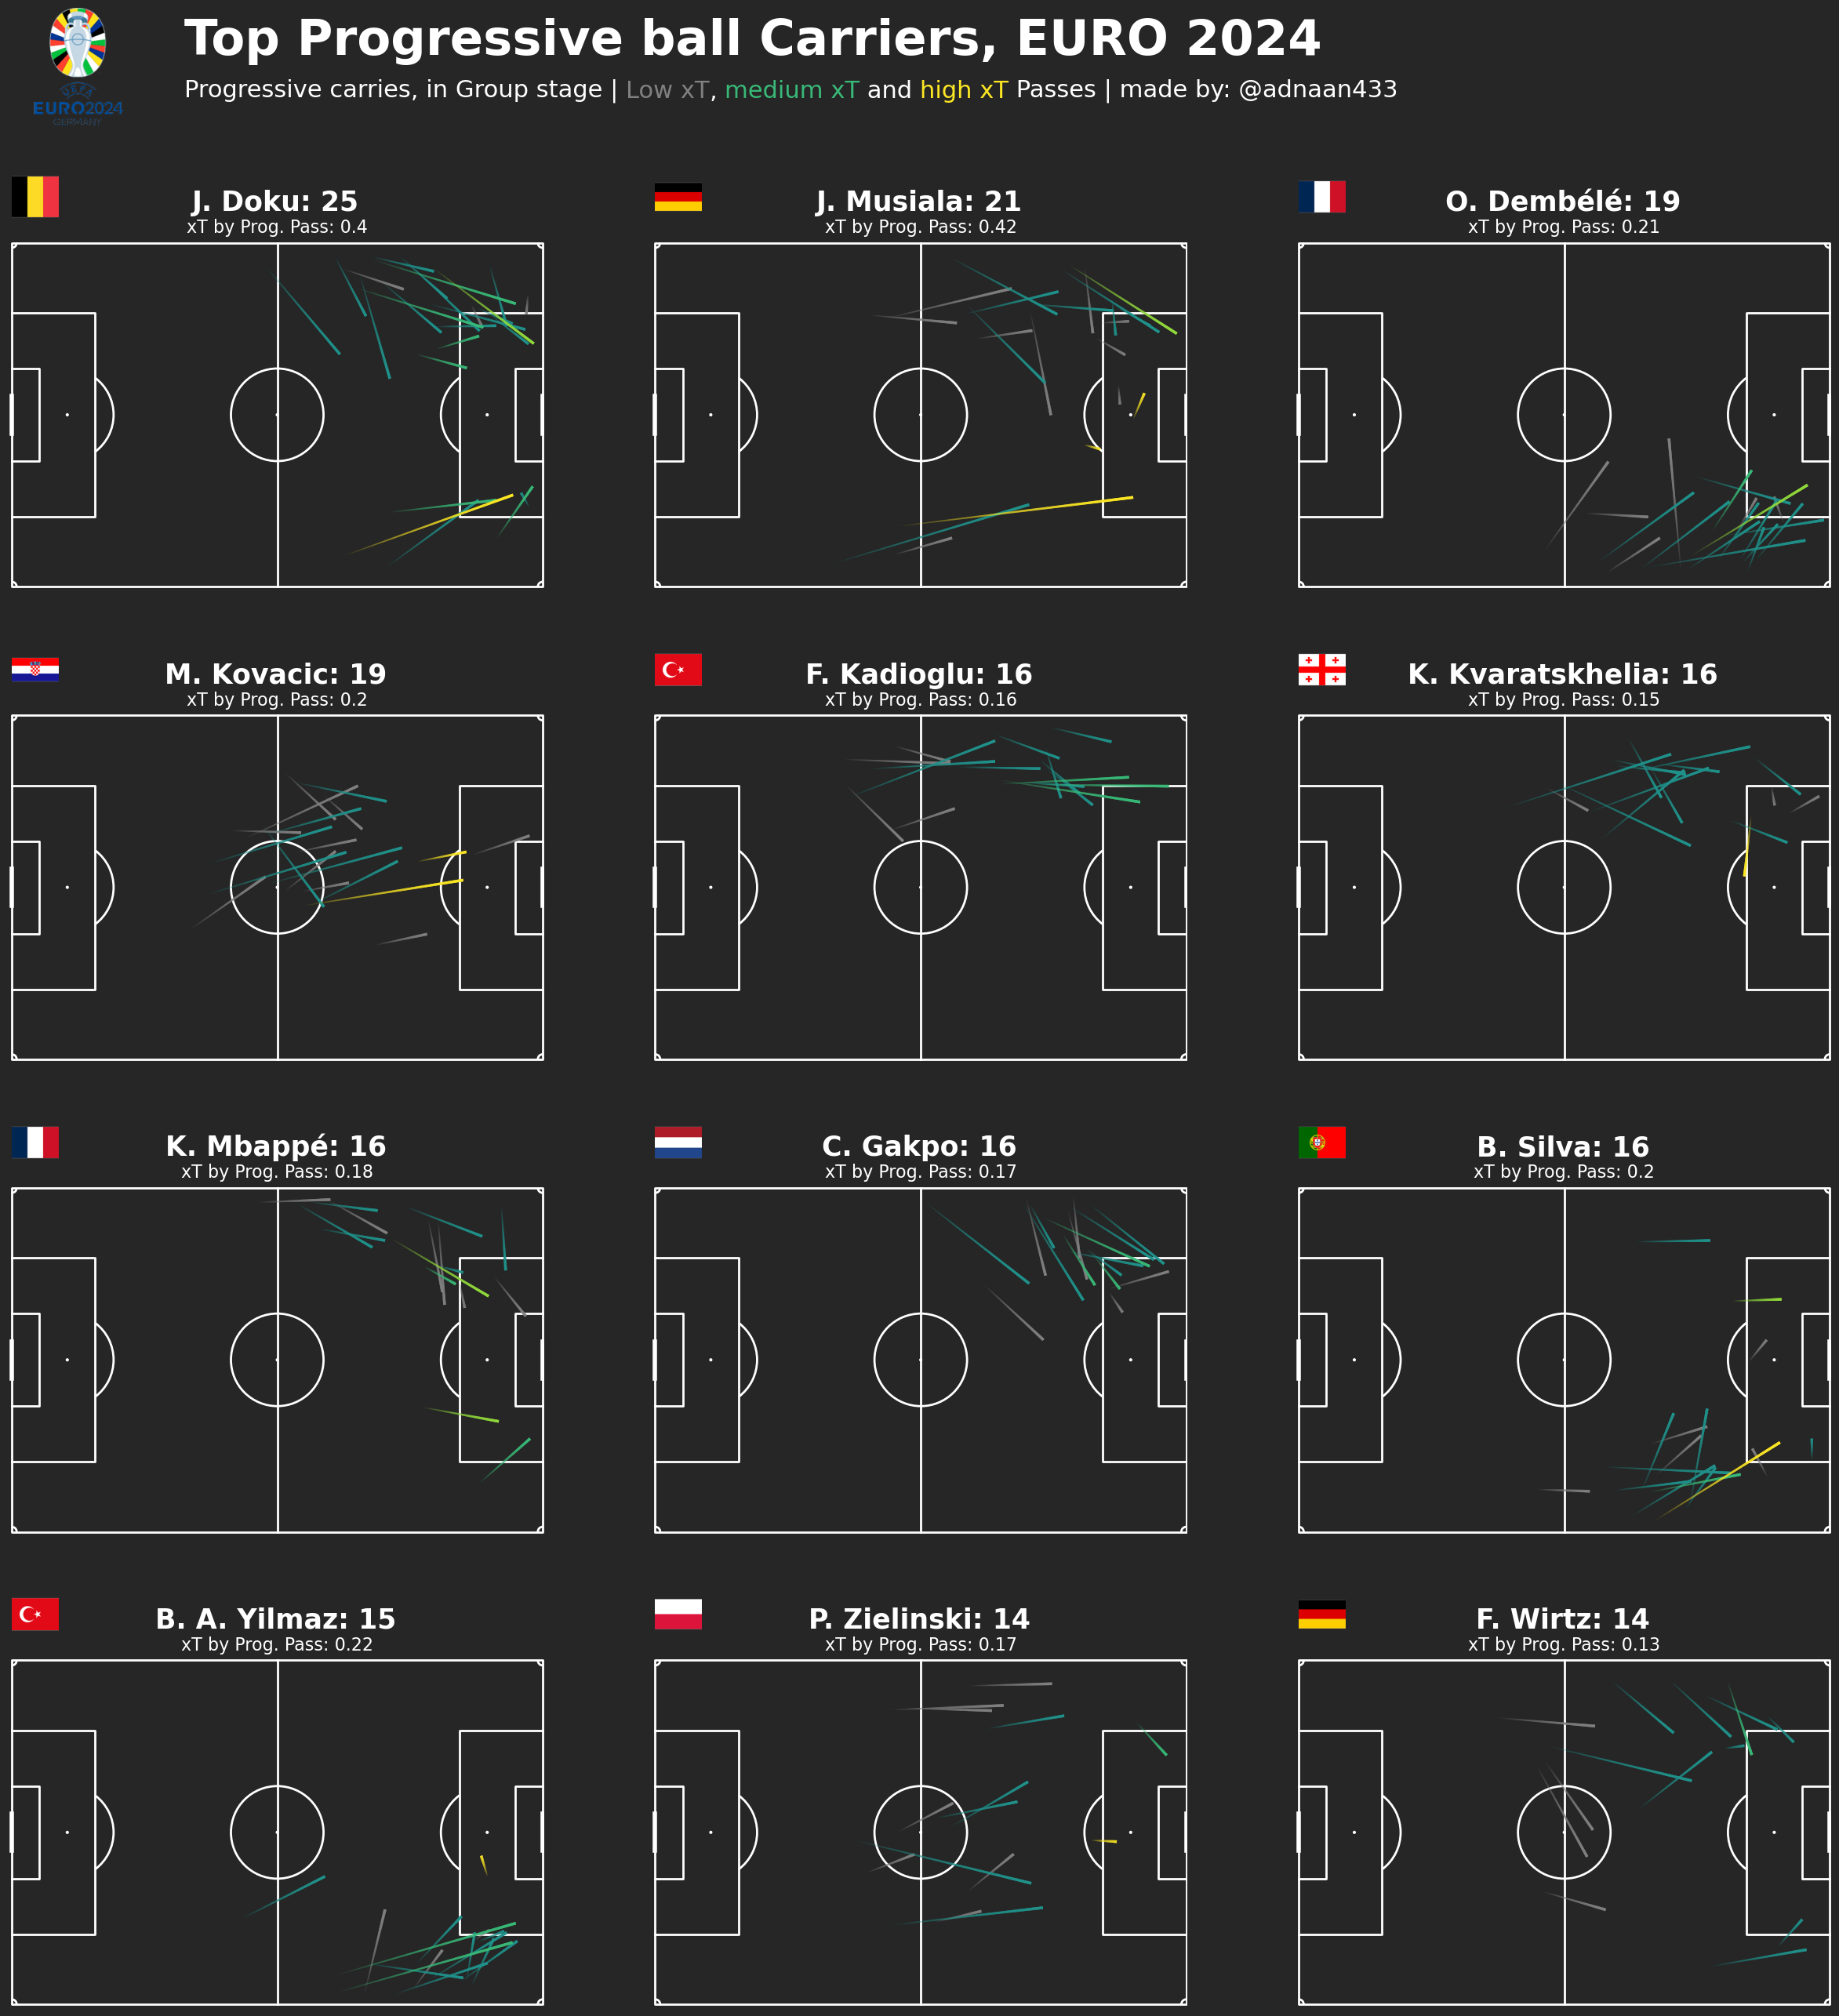

In [110]:
players = top10

fig, axs = plt.subplots(4, 3, figsize=(30, 30), facecolor='#262626')

for i, player in enumerate(players):
    row = i // 3
    col = i % 3
    plot_player_prog_carry(axs[row, col], player)

fig.text(0.2, 0.95, 'Top Progressive ball Carriers, EURO 2024', color='w', fontsize=45, fontweight='bold')
fig_text(0.2, 0.94, 'Progressive carries, in Group stage | <Low xT>, <medium xT> and <high xT> Passes | made by: @adnaan433', 
         color='w', fontsize=22, highlight_textprops=[{'color':'#808080'}, {'color':'#38b977'}, {'color':'#fce724'}])

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/EURO2024.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.13, bottom=0.92, width=0.05, height=0.05)

# Threat

Pass

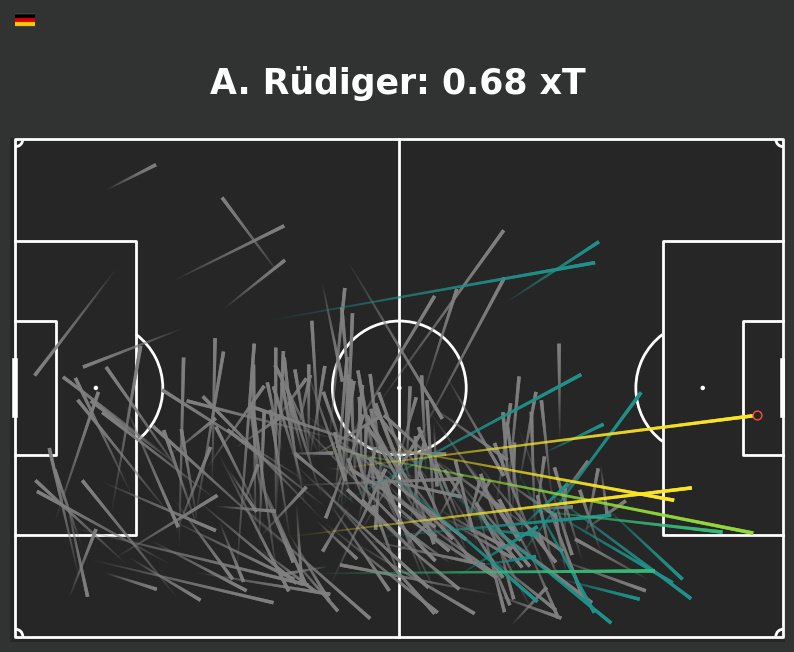

In [122]:
def plot_top_xTP(ax, pname):
    dfp = df[(df['name']==pname) & (df['type']=='Pass') & (df['outcomeType']=='Successful') & 
             (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn'))]
    dfkp = dfp[dfp['qualifiers'].str.contains('KeyPass')]
    dfas = dfp[dfp['qualifiers'].str.contains('IntentionalGoalAssist')]

    pitch = Pitch(pitch_type='uefa', pitch_color='#262626', line_color='w', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.75, 105.25)
    ax.set_ylim(-0.75, 68.25)

    df1 = dfp[dfp['xT']<=0.005]
    df2 = dfp[(dfp['xT']>0.005) & (dfp['xT']<=0.02)]
    df3 = dfp[(dfp['xT']>0.02) & (dfp['xT']<=0.03)]
    df4 = dfp[(dfp['xT']>0.03) & (dfp['xT']<=0.04)]
    df5 = dfp[(dfp['xT']>0.04)]

    pitch.lines(df1.x, df1.y, df1.endX, df1.endY, color='#808080', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df2.x, df2.y, df2.endX, df2.endY, color='#1f928b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df3.x, df3.y, df3.endX, df3.endY, color='#38b977', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df4.x, df4.y, df4.endX, df4.endY, color='#91da3b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df5.x, df5.y, df5.endX, df5.endY, color='#fce724', lw=2.5, comet=True, transparent=True, ax=ax)

    ax.scatter(dfkp.endX, dfkp.endY, s=40, color='#262626', edgecolor='#ff4b44', zorder=2)
    ax.scatter(dfas.endX, dfas.endY, s=40, color='#ff4b44', edgecolor='w', zorder=3)
    xT = dfp['xT'].sum().round(2)
    show_name = dfp['shortName'].unique()[0]
    
    ax.set_title(f'{show_name}: {xT} xT', color='w', fontsize=25, fontweight='bold', y=1.07)
    # ax.text(52.5, 71, f'xT by Prog. Pass: {xT}', color='w', fontsize=16, ha='center', va='center')

    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,66))
    ax_size = 0.02
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    return

fig, ax = plt.subplots(figsize=(10,10), facecolor='#313332')
plot_top_xTP(ax, "Antonio Rüdiger")

In [125]:
dfp = df[(df['type']=='Pass') & (df['outcomeType']=='Successful') & 
             (~df['qualifiers'].str.contains('Corner|Freekick|ThrowIn'))]
dfp_xT = dfp.groupby(['name']).sum().round(2)
dfp_xt = dfp_xT.sort_values(by='xT', ascending=False)
top10df = dfp_xt['xT'].head(12)
top10 = top10df.reset_index()
top10 = top10['name'].unique()
top10df

name
Toni Kroos               1.18
Andrija Zivkovic         1.12
Ivan Perisic             0.91
Cody Gakpo               0.89
Joshua Kimmich           0.87
Jérémy Doku              0.87
Dusan Tadic              0.68
Antonio Rüdiger          0.68
Khvicha Kvaratskhelia    0.68
Baris Alper Yilmaz       0.61
Federico Chiesa          0.60
Denzel Dumfries          0.56
Name: xT, dtype: float64

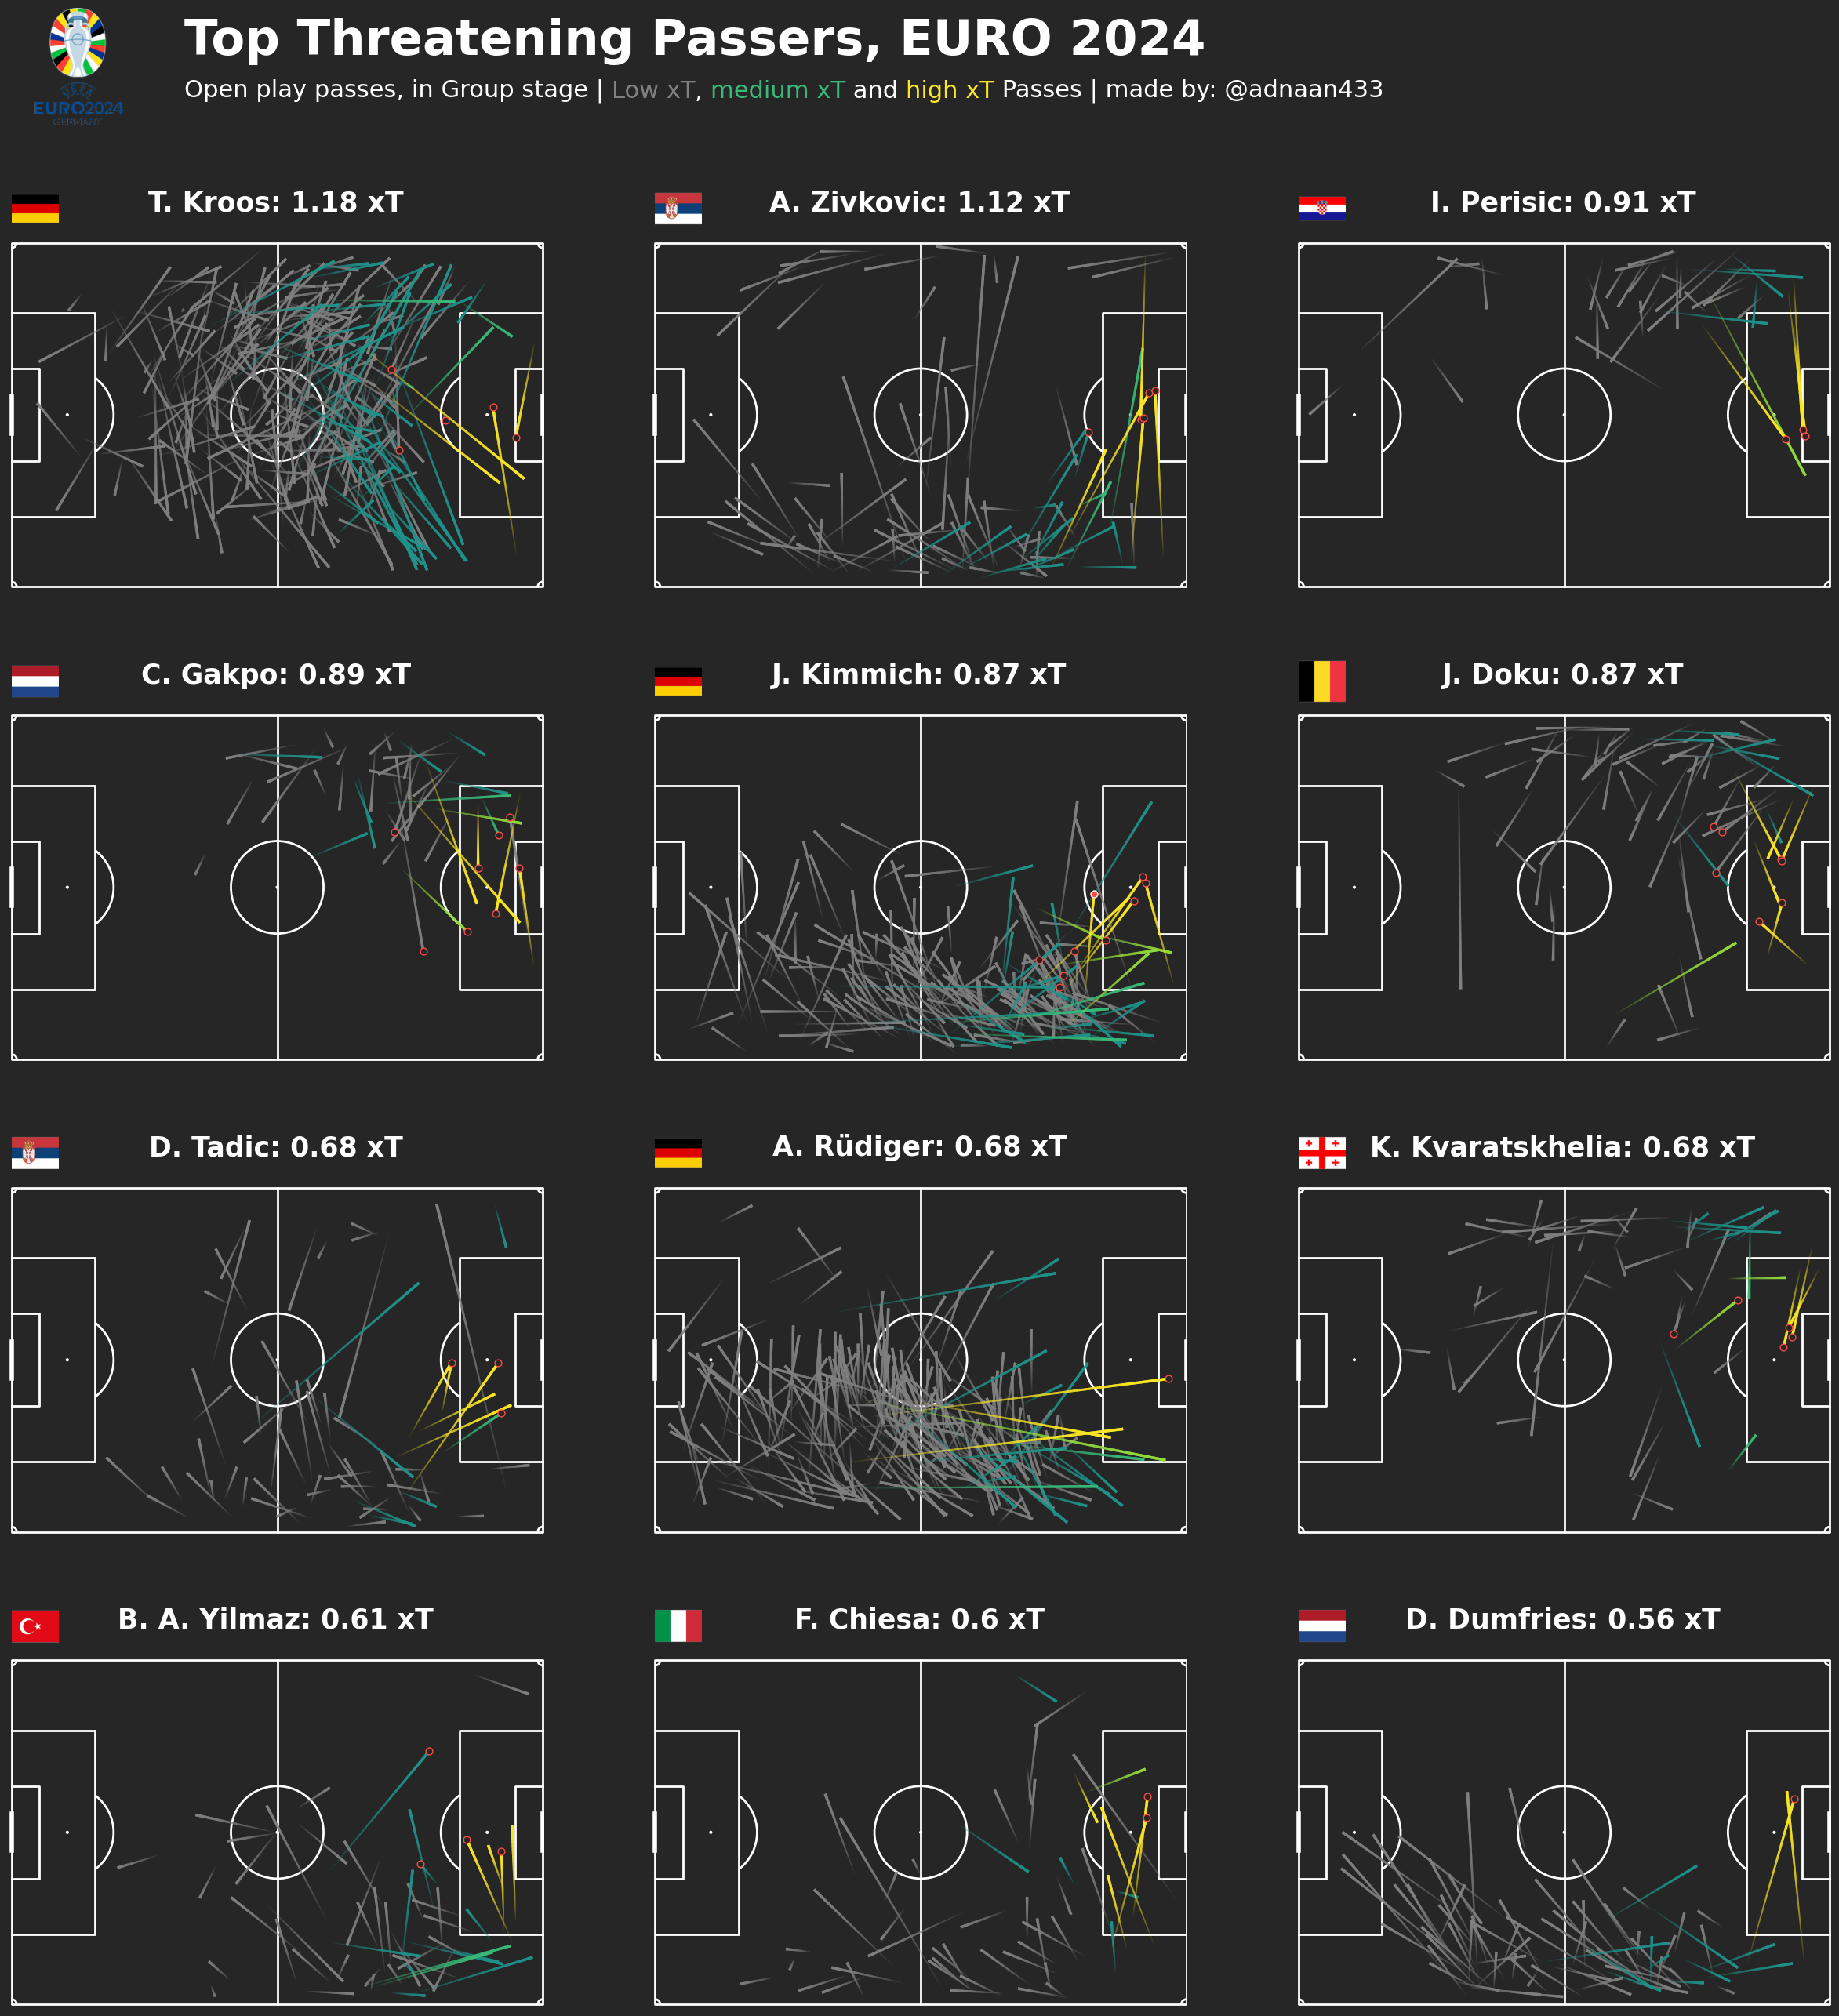

In [127]:
players = top10

fig, axs = plt.subplots(4, 3, figsize=(30, 30), facecolor='#262626')

for i, player in enumerate(players):
    row = i // 3
    col = i % 3
    plot_top_xTP(axs[row, col], player)

fig.text(0.2, 0.95, 'Top Threatening Passers, EURO 2024', color='w', fontsize=45, fontweight='bold')
fig_text(0.2, 0.94, 'Open play passes, in Group stage | <Low xT>, <medium xT> and <high xT> Passes | made by: @adnaan433', 
         color='w', fontsize=22, highlight_textprops=[{'color':'#808080'}, {'color':'#38b977'}, {'color':'#fce724'}])

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/EURO2024.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.13, bottom=0.92, width=0.05, height=0.05)

Carry

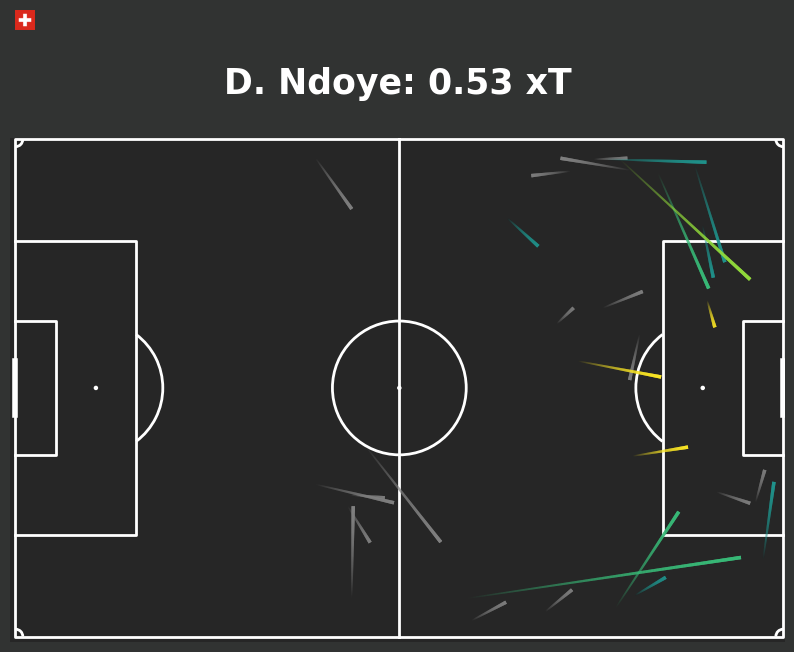

In [14]:
def plot_top_xTC(ax, pname):
    dfp = df[(df['name']==pname) & (df['type']=='Carry')]
    # dfkp = df[(df['name']==pname) & (df['type']=='Carry') & (df['qualifiers'].shift(-1).str.contains('KeyPass'))]
    # dfas = dfp[dfp['qualifiers'].str.contains('IntentionalGoalAssist')]

    pitch = Pitch(pitch_type='uefa', pitch_color='#262626', line_color='w', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.75, 105.25)
    ax.set_ylim(-0.75, 68.25)

    df1 = dfp[dfp['xT']<=0.005]
    df2 = dfp[(dfp['xT']>0.005) & (dfp['xT']<=0.02)]
    df3 = dfp[(dfp['xT']>0.02) & (dfp['xT']<=0.03)]
    df4 = dfp[(dfp['xT']>0.03) & (dfp['xT']<=0.04)]
    df5 = dfp[(dfp['xT']>0.04)]

    pitch.lines(df1.x, df1.y, df1.endX, df1.endY, color='#808080', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df2.x, df2.y, df2.endX, df2.endY, color='#1f928b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df3.x, df3.y, df3.endX, df3.endY, color='#38b977', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df4.x, df4.y, df4.endX, df4.endY, color='#91da3b', lw=2.5, comet=True, transparent=True, ax=ax)
    pitch.lines(df5.x, df5.y, df5.endX, df5.endY, color='#fce724', lw=2.5, comet=True, transparent=True, ax=ax)

    # ax.scatter(dfkp.endX, dfkp.endY, s=40, color='#262626', edgecolor='#ff4b44', zorder=2)
    # ax.scatter(dfas.endX, dfas.endY, s=40, color='#ff4b44', edgecolor='w', zorder=3)
    xT = dfp['xT'].sum().round(2)
    show_name = dfp['shortName'].unique()[0]
    
    ax.set_title(f'{show_name}: {xT} xT', color='w', fontsize=25, fontweight='bold', y=1.07)
    # ax.text(52.5, 71, f'xT by Prog. Pass: {xT}', color='w', fontsize=16, ha='center', va='center')

    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,66))
    ax_size = 0.02
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    return

fig, ax = plt.subplots(figsize=(10,10), facecolor='#313332')
plot_top_xTC(ax, "Dan Ndoye")

In [5]:
dfp = df[(df['type']=='Carry')]
dfp_xT = dfp.groupby(['name']).sum().round(2)
dfp_xt = dfp_xT.sort_values(by='xT', ascending=False)
top10df = dfp_xt['xT'].head(12)
top10 = top10df.reset_index()
top10 = top10['name'].unique()
top10df

name
Dan Ndoye             0.53
Jamal Musiala         0.45
Kenan Yildiz          0.42
Rafael Leão           0.42
Jérémy Doku           0.42
Ferdi Kadioglu        0.28
Mateo Kovacic         0.27
Ousmane Dembélé       0.27
Milan Skriniar        0.25
Lamine Yamal          0.24
Roman Yaremchuk       0.24
Baris Alper Yilmaz    0.23
Name: xT, dtype: float64

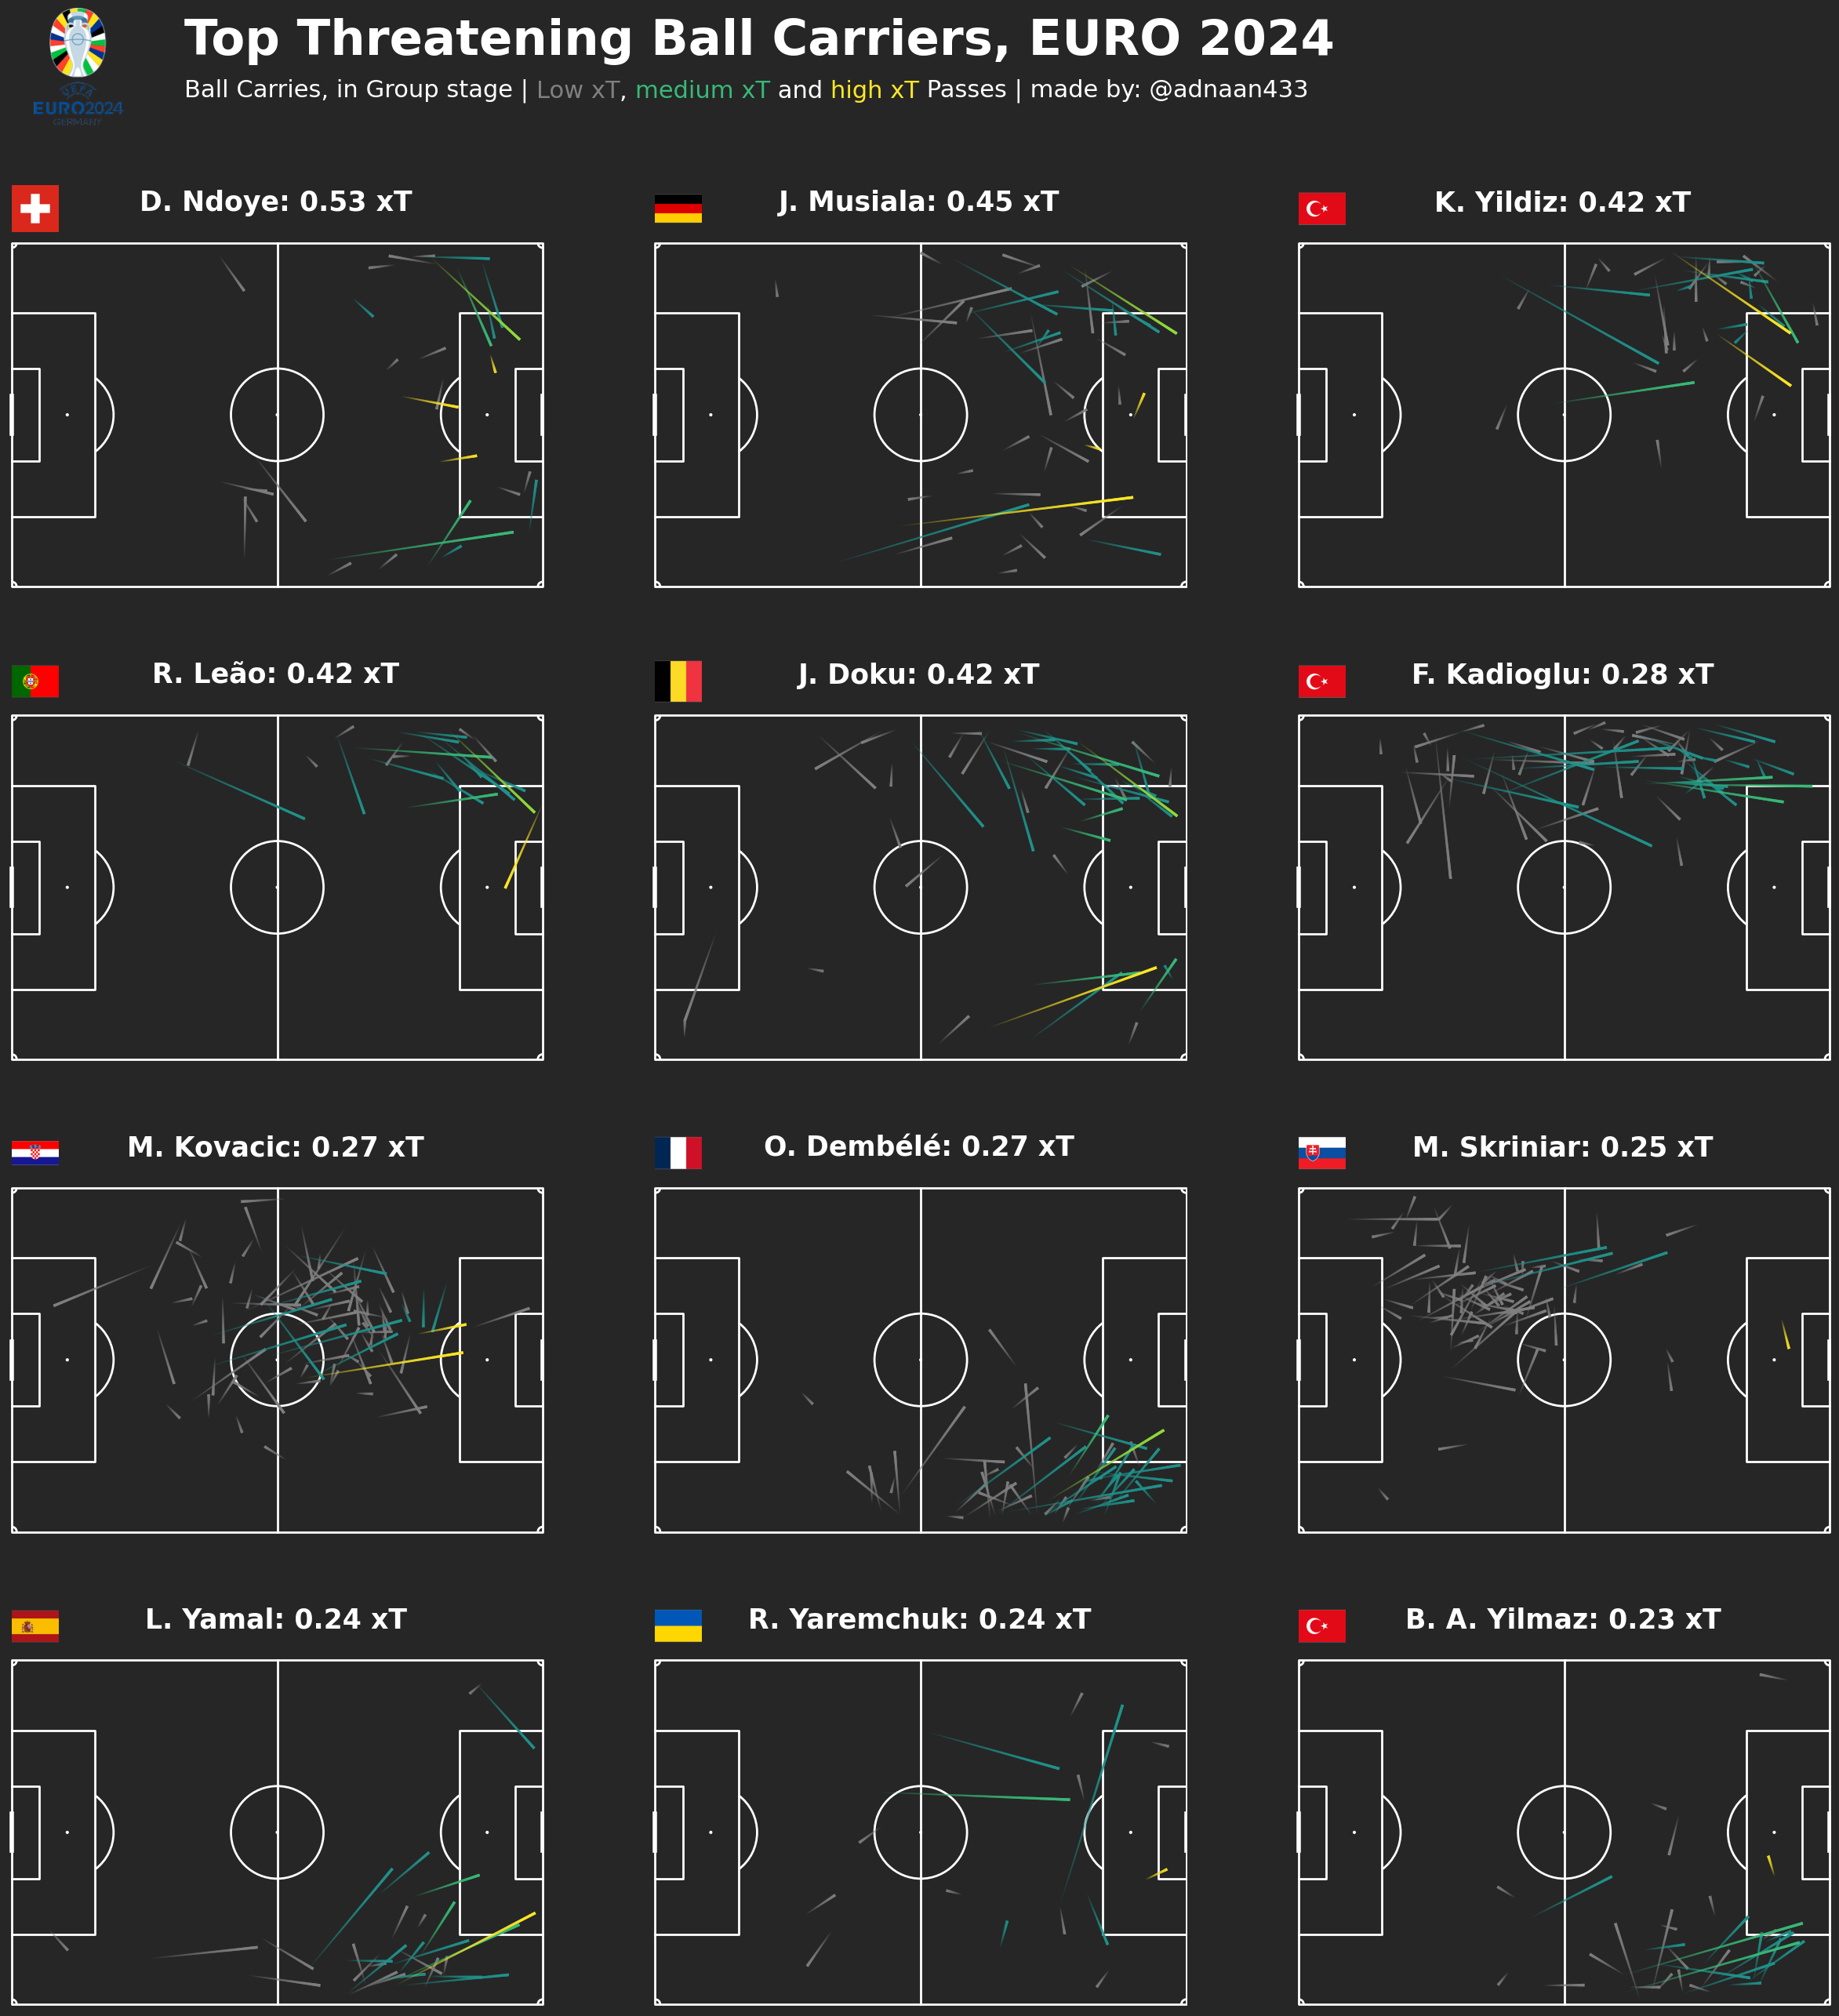

In [15]:
players = top10

fig, axs = plt.subplots(4, 3, figsize=(30, 30), facecolor='#262626')

for i, player in enumerate(players):
    row = i // 3
    col = i % 3
    plot_top_xTC(axs[row, col], player)

fig.text(0.2, 0.95, 'Top Threatening Ball Carriers, EURO 2024', color='w', fontsize=45, fontweight='bold')
fig_text(0.2, 0.94, 'Ball Carries, in Group stage | <Low xT>, <medium xT> and <high xT> Passes | made by: @adnaan433', 
         color='w', fontsize=22, highlight_textprops=[{'color':'#808080'}, {'color':'#38b977'}, {'color':'#fce724'}])

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/EURO2024.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.13, bottom=0.92, width=0.05, height=0.05)